**Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.**

Text(0.5, 1.0, 'Вероятность того, что стрелок попадет в цель ровно 85 раз = 0.048062')

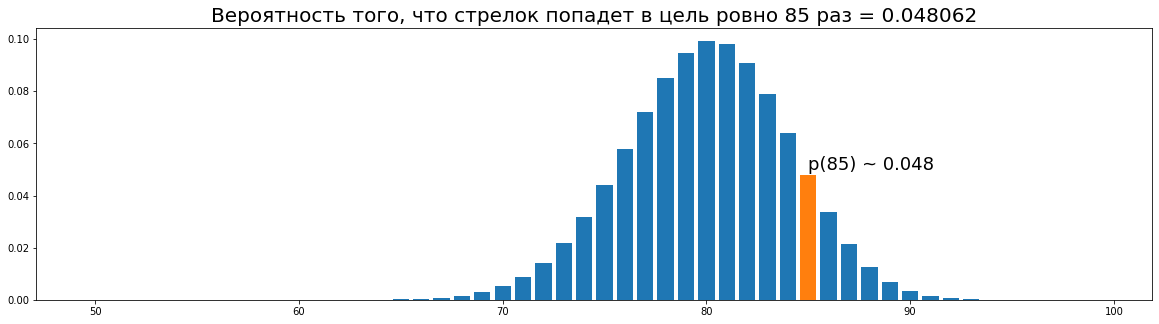

In [111]:
from math import factorial, exp
from matplotlib import pyplot as plt

def combinations(k, n) -> int:
    return int(factorial(n) / (factorial(k) * factorial(n-k)))

# пишем функцию биномиального распределения
def binomial(p, k, n) -> float:
    return combinations(k, n) * (p**k) * ((1-p)**(n-k)) 

p = 0.8
k = 85 
n = 100
tries = [i for i in range(n)]
probabilitys = [binomial(p, k, n) for k in range(n)]

# строим график
plt.figure(figsize=(20, 5))
plt.bar(tries[50:], probabilitys[50:])
plt.bar(k, binomial(p, k, n))

# решение в следующей строке
plt.text(85, .05, f'p(85) ~ {round(binomial(p, k, n),3)}', fontsize=18)
plt.title( f'Вероятность того, что стрелок попадет в цель ровно 85 раз = {round(binomial(p, k, n), 6)}', fontsize=20)

***
**Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?**

Text(0.5, 1.0, 'Распределение вероятности перегорания лампочек в 1-й день')

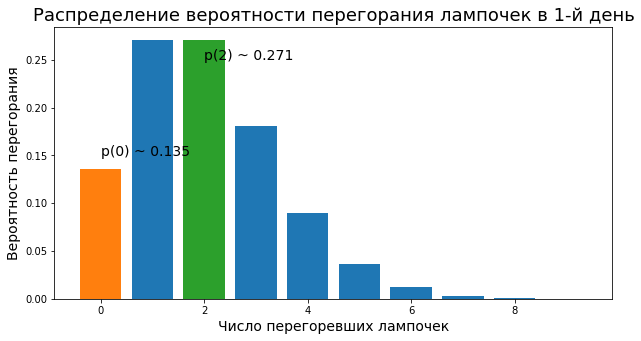

In [112]:
#пишем функцию распределения Пуассона
def puasson(p, n, m) -> float:
    lambda_ = p*n
    return (lambda_ ** m / factorial(m)) * exp(-lambda_)


p = 0.0004
n = 5000
m1 = 0
m2 = 2

probabilitys = [puasson(p, n, m) for m in range(10)]
tries = [i for i in range(10)]


# строим график
plt.figure(figsize=(10, 5))
plt.bar(tries, probabilitys)
plt.bar(m1, puasson(p, n, m1))
plt.bar(m2, puasson(p, n, m2))

# решение в следующих двух строках
plt.text(0, .15, f'p(0) ~ {round(puasson(p, n, m1),3)}', fontsize=14)
plt.text(2, .25, f'p(2) ~ {round(puasson(p, n, m2),3)}', fontsize=14)

plt.xlabel('Число перегоревших лампочек', fontsize=14)
plt.ylabel('Вероятность перегорания', fontsize=14)
plt.title('Распределение вероятности перегорания лампочек в 1-й день', fontsize=18)


***
**Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?**

In [62]:
p = 0.5
k = 70 
n = 144

binomial(p, k, n)

0.06281178035144776

***
**В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. Какова вероятность того, что все мячи белые? Какова вероятность того, что ровно два мяча белые? Какова вероятность того, что хотя бы один мяч белый?**

**Все 4 белые:**

In [115]:
((7/10) * (6/9)) * ((9/11) * (8/10))

0.3054545454545455

**2 белые**

Сформулируем задачу так:

(все в первой белые или все во второй белые)
или
(строго 1 в первой белый и строго 1 во второй белый)


In [172]:
a = (7/10 * 6/9) * (2/11 * 1/10) # оба в первой белые, а во второй черные
b = (9/11 * 8/10) * (3/10 * 2/9) # оба во второй белые, а в первой черные

C = (a + b) # складываем вероятности отдельных несовместных событий 

d = 1- ((3/10 * 2/9) + (7/10 * 6/9))  # из всех событий вычитаем вероятность, что все белые и все черные. 
                                      # Таким образом получаем, что 1 шар белый, а другой - черный


e = 1- ((2/11 * 1/10) + (9/11 * 8/10)) # аналогично для второй корзины

F = d * e #поскольку события должны произойти вместе, то перемножаем вероятности

G = (F + C) #складываем вероятности отдельных событий

G


0.2048484848484849

**Хотя бы один белый:**

Проверяем по противоположности: 1  - Все шары черные:

In [152]:
1 - (3/10*2/9*2/11*1/10)

0.9987878787878788